In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os
import glob
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
glob.glob('./Training Text Files/*.txt')

['./Training Text Files\\500k dataset trained ALBERT.txt',
 './Training Text Files\\500k trained on MobileBert.txt',
 './Training Text Files\\distilbert training.txt',
 './Training Text Files\\Training 500k Dataset BERT.txt',
 './Training Text Files\\training electra base.txt',
 './Training Text Files\\Training electra small.txt',
 './Training Text Files\\Training up to 6 epochs.txt']

In [3]:
MOBILEBERT_PATH = "./Training Text Files\\500k trained on MobileBert.txt"
ALBERT_PATH = "./Training Text Files\\500k dataset trained ALBERT.txt"
BERT_PATH = './Training Text Files\\Training 500k Dataset BERT.txt'
ELECTRA_BASE_PATH = './Training Text Files\\training electra base.txt'
ELECTRA_SMALL_PATH = './Training Text Files\\Training electra small.txt'
DISTILROBERTA_PATH ='./Training Text Files\\Training up to 6 epochs.txt'
DISTILBERT_PATH = './Training Text Files\\distilbert training.txt'

In [4]:
with open(MOBILEBERT_PATH, 'r') as file:
    mobile_bert_lines = file.readlines()
    
with open(ALBERT_PATH, 'r') as file:
    albert_lines = file.readlines()
    
with open(BERT_PATH, 'r') as file:
    bert_lines = file.readlines()
    
with open(ELECTRA_SMALL_PATH, 'r') as file:
    electra_small_lines = file.readlines()
    
with open(ELECTRA_BASE_PATH, 'r') as file:
    electra_base_lines = file.readlines()
    
with open(DISTILROBERTA_PATH, 'r') as file:
    distilroberta_lines = file.readlines()
    
with open(DISTILBERT_PATH, 'r') as file:
    distilbert_lines = file.readlines()

In [5]:
bert_training_epoch_losses = []
mobile_bert_training_epoch_losses = []
electra_small_training_epoch_losses = []
electra_base_training_epoch_losses = []
distilbert_training_epoch_losses = []
albert_training_epoch_losses = []
distilroberta_training_epoch_losses = []


for line in bert_lines:
    if 'loss=' in line:
        if 'Epoch' in line:
            bert_training_epoch_losses.append(float(line.split("loss=")[1].split(" ")[0][:-1]))

for line in mobile_bert_lines:
    if 'loss=' in line:
        if 'Epoch' in line:
            mobile_bert_training_epoch_losses.append(float(line.split("loss=")[1].split(" ")[0][:-1]))

for line in electra_small_lines:
    if 'loss=' in line:
        if 'Epoch' in line:
            electra_small_training_epoch_losses.append(float(line.split("loss=")[1].split(" ")[0][:-1]))

for line in electra_base_lines:
    if 'loss=' in line:
        if 'Epoch' in line:
            electra_base_training_epoch_losses.append(float(line.split("loss=")[1].split(" ")[0][:-1]))

for line in distilbert_lines:
    if 'loss=' in line:
        if 'Epoch' in line:
            distilbert_training_epoch_losses.append(float(line.split("loss=")[1].split(" ")[0][:-1]))

for line in albert_lines:
    if 'loss=' in line:
        if 'Epoch' in line:
            albert_training_epoch_losses.append(float(line.split("loss=")[1].split(" ")[0][:-1]))

for line in distilroberta_lines:
    if 'loss=' in line:
        if 'Epoch' in line:
            distilroberta_training_epoch_losses.append(float(line.split("loss=")[1].split(" ")[0][:-1]))

In [6]:
print(bert_training_epoch_losses[2:10])
print(electra_base_training_epoch_losses[2:10])
print(electra_small_training_epoch_losses[3:10])
print(distilbert_training_epoch_losses[1:10])
print(mobile_bert_training_epoch_losses[22:30])
print(albert_training_epoch_losses[1:10])
print(distilroberta_training_epoch_losses[2:10])

print(len(bert_training_epoch_losses[2:355]))
print(len(electra_base_training_epoch_losses[2:]))
print(len(electra_small_training_epoch_losses[3:356]))
print(len(distilbert_training_epoch_losses[1:354]))
print(len(mobile_bert_training_epoch_losses[21:374]))
print(len(albert_training_epoch_losses[1:354]))
print(len(distilroberta_training_epoch_losses[2::4][:353]))

[5.452072, 4.883894, 4.656607, 4.262416, 4.003701, 3.533865, 4.010629, 3.385737]
[6.848611, 5.001602, 4.869281, 4.922014, 4.864307, 4.924694, 4.69886, 4.757399]
[7.559704, 6.355765, 6.16975, 6.225584, 5.860885, 5.315312, 5.328777]
[7.204224, 3.662887, 2.986175, 2.674053, 3.106879, 2.709266, 2.897742, 1.852796, 2.208641]
[7.918298, 6.750062, 6.928875, 7.122933, 6.844051, 6.104911, 6.505527, 5.398997]
[5.56173, 4.571589, 4.299243, 3.880357, 3.67739, 3.90381, 3.744676, 3.835467, 3.393238]
[4.222236, 4.16734, 4.215478, 3.835551, 3.977399, 3.587446, 3.842905, 3.694134]
353
353
353
353
353
353
353


In [7]:
bert_loss = bert_training_epoch_losses[2:355]
electra_base_loss = electra_base_training_epoch_losses[2:]
electra_small_loss = electra_small_training_epoch_losses[3:356]
distilbert_loss = distilbert_training_epoch_losses[1:354]
mobilebert_loss = mobile_bert_training_epoch_losses[21:374]
albert_loss = albert_training_epoch_losses[1:354]
distilroberta_loss = distilroberta_training_epoch_losses[2::4][:353]

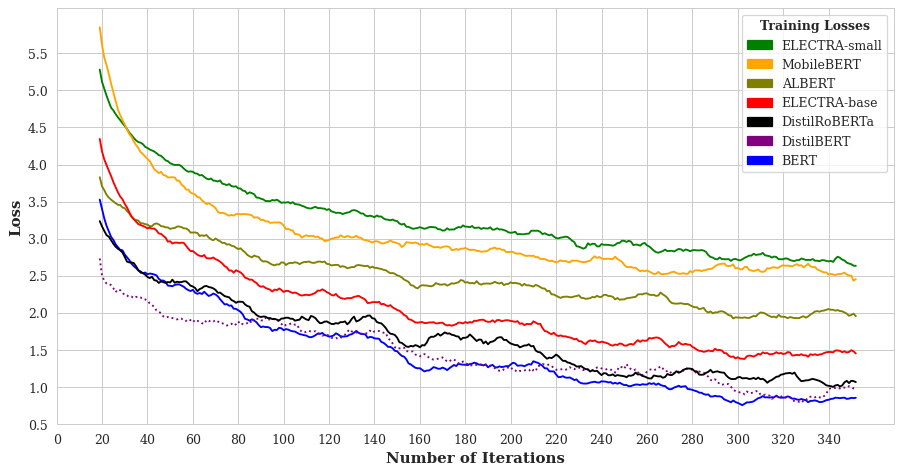

In [8]:
sns.set_style("whitegrid")

window_size = 20
plt.figure(figsize=(12, 6), dpi=90)

smoothed_loss = np.convolve(electra_small_loss, np.ones(window_size) / window_size, mode='valid')
x_values = np.arange(window_size - 1, len(electra_small_loss))
# plt.plot(electra_small_loss, label="ELECTRA-small-based")
plt.plot(x_values, smoothed_loss, label="ELECTRA-small", color = 'green')

smoothed_loss = np.convolve(mobilebert_loss, np.ones(window_size) / window_size, mode='valid')
x_values = np.arange(window_size - 1, len(mobilebert_loss))
# plt.plot(mobilebert_loss, label="MobileBERT-based")
# plt.plot(x_values, smoothed_loss, color='r', alpha=0.6)
plt.plot(x_values, smoothed_loss, label="MobileBERT", color = 'orange')

smoothed_loss = np.convolve(albert_loss, np.ones(window_size) / window_size, mode='valid')
x_values = np.arange(window_size - 1, len(albert_loss))
# plt.plot(distilbert_loss, label="DistilBERT-based")
plt.plot(x_values, smoothed_loss, label="ALBERT", color = 'olive')


smoothed_loss = np.convolve(bert_loss, np.ones(window_size) / window_size, mode='valid')
x_values = np.arange(window_size - 1, len(bert_loss))
# plt.plot(bert_loss, label="BERT-based")
plt.plot(x_values, smoothed_loss, label="BERT", color = 'blue')


smoothed_loss = np.convolve(electra_base_loss, np.ones(window_size) / window_size, mode='valid')
x_values = np.arange(window_size - 1, len(electra_base_loss))
# plt.plot(electra_base_loss, label="ELECTRA-base-based")
plt.plot(x_values, smoothed_loss, label='ELECTRA-base', color = 'red')

smoothed_loss = np.convolve(distilbert_loss, np.ones(window_size) / window_size, mode='valid')
x_values = np.arange(window_size - 1, len(distilbert_loss))
# plt.plot(distilbert_loss, label="DistilBERT-based")
plt.plot(x_values, smoothed_loss, label="DistilBERT", color = 'purple', linestyle = ":")


smoothed_loss = np.convolve(distilroberta_loss, np.ones(window_size) / window_size, mode='valid')
x_values = np.arange(window_size - 1, len(albert_loss))
# plt.plot(distilbert_loss, label="DistilBERT-based")
plt.plot(x_values, smoothed_loss, label="DistilRoBERTa", color = 'black')


square_patch7 = mpatches.Patch(color='blue', label='BERT')
square_patch2 = mpatches.Patch(color='orange', label='MobileBERT')
square_patch1 = mpatches.Patch(color='green', label='ELECTRA-small')
square_patch4 = mpatches.Patch(color='red', label='ELECTRA-base')
square_patch6 = mpatches.Patch(color='purple', label='DistilBERT')
square_patch3 = mpatches.Patch(color='olive', label='ALBERT')
square_patch5 = mpatches.Patch(color='black', label='DistilRoBERTa')


handles, labels = plt.gca().get_legend_handles_labels()
handles[:7] = [square_patch1, square_patch2, square_patch3, square_patch4, square_patch5, square_patch6, square_patch7]

# plt.title("Training Loss Curve of Different Models", fontdict={'weight': 'bold', 'size': 12})
legend = plt.legend(handles=handles, loc='best', frameon=True, title="Training Losses", prop = {'size': 10, 'family': 'serif'})
plt.xlabel('Number of Iterations', fontdict={'weight': 'bold', 'size': 12, 'family': 'serif'})
plt.ylabel("Loss", fontdict={'weight': 'bold', 'size': 12, 'family': 'serif'})

plt.xticks(np.arange(0, len(bert_loss), 20), fontsize=10, fontfamily='Serif', fontweight='normal')
plt.yticks(np.arange(0.5, 6, 0.5), fontsize = 10, fontfamily='Serif', fontweight='normal')

legend.get_title().set_fontsize(10)  
legend.get_title().set_fontfamily('Serif')
legend.get_title().set_fontweight('bold')

plt.savefig("./Figures/training loss curve of different models.png", dpi = 300, bbox_inches = 'tight')
plt.show()


In [9]:
DISTILBERT_TRAIN_VALIDATION = "EPOCH_1_COMPLETE Train Data DistilBERT.txt"

In [10]:
with open(DISTILBERT_TRAIN_VALIDATION, 'r') as file:
    lines = file.readlines()

epoch_loss = []
temp_eval_loss = []
eval_loss = []
overall_pair_loss = []

for line in lines:
    if 'loss=' in line:
        if 'Epoch:' in line:
            if len(epoch_loss) == 0:
                epoch_loss.append(float(line.split('loss=')[-1].split(', ')[0]))
            else:
                last_value = epoch_loss[-1]
                present_value = float(line.split('loss=')[-1].split(', ')[0])
                if abs(present_value - last_value) > 0.01:
                    epoch_loss.append(present_value)
            
        elif 'Eval' in line:
            temp_eval_loss.append(float(line.split('loss=')[-1].strip(' \n')))
            if len(temp_eval_loss) == 15:
                overall_pair_loss.append((epoch_loss[-1], max(temp_eval_loss)))
                eval_loss.append(max(temp_eval_loss) + 0.05)
                temp_eval_loss = []

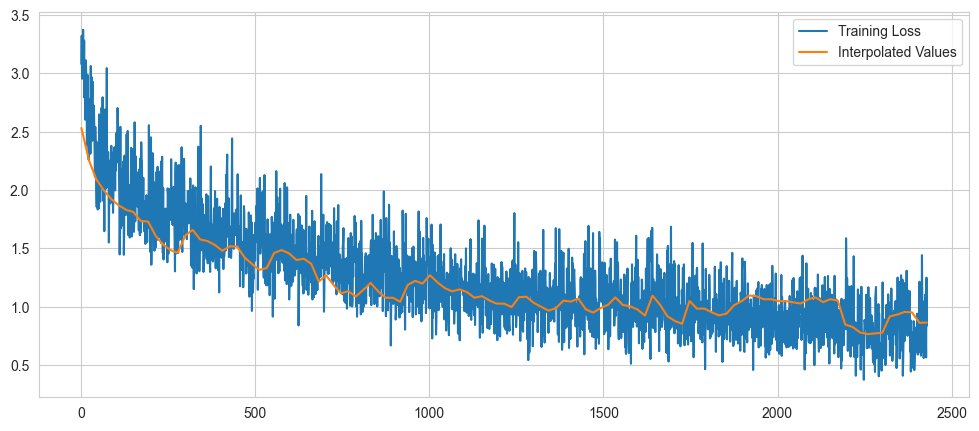

In [11]:
epochs = epoch_loss[4::]
num_new_points = len(epochs)
new_indices = np.linspace(0, len(eval_loss) - 1, num_new_points)
interpolated_values = np.interp(new_indices, np.arange(len(eval_loss)), eval_loss)

plt.figure(figsize = (12, 5))
plt.plot(np.arange(len(epochs)), epochs, label = 'Training Loss')
plt.plot(interpolated_values, label='Interpolated Values')
plt.legend()
plt.show()

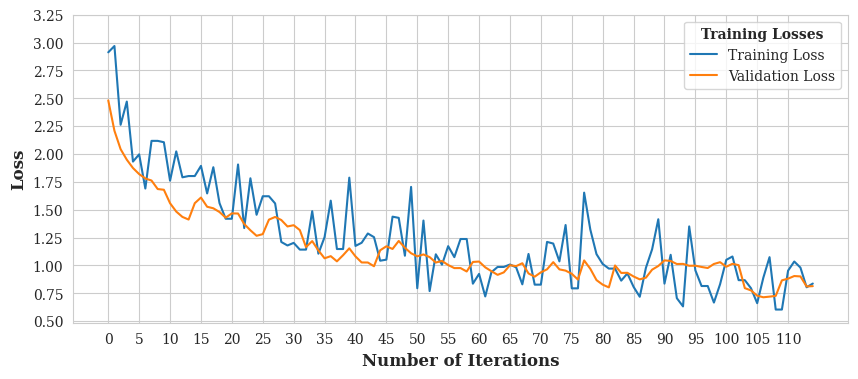

In [12]:
df = pd.DataFrame(overall_pair_loss, columns = ['epoch', 'eval'])

plt.figure(figsize = (10, 4))

sns.set_style("whitegrid")
plt.plot(np.arange(len(overall_pair_loss)), df['epoch'], label = 'Training Loss')
plt.plot(np.arange(len(overall_pair_loss)), df['eval'], label = 'Validation Loss')

plt.xlabel('Number of Iterations', fontdict={'weight': 'bold', 'size': 12, 'family': 'serif'})
plt.ylabel("Loss", fontdict={'weight': 'bold', 'size': 12, 'family': 'serif'})
plt.xticks(np.arange(0, len(overall_pair_loss), 5), fontsize=10, fontfamily='Serif', fontweight='normal')
plt.yticks(np.arange(0.5, 3.5, 0.25), fontsize = 10, fontfamily='Serif', fontweight='normal')

legend = plt.legend(loc='best', frameon=True, title="Training Losses", prop = {'size': 10, 'family': 'serif'})
legend.get_title().set_fontsize(10)  
legend.get_title().set_fontfamily('Serif')
legend.get_title().set_fontweight('bold')

plt.show()

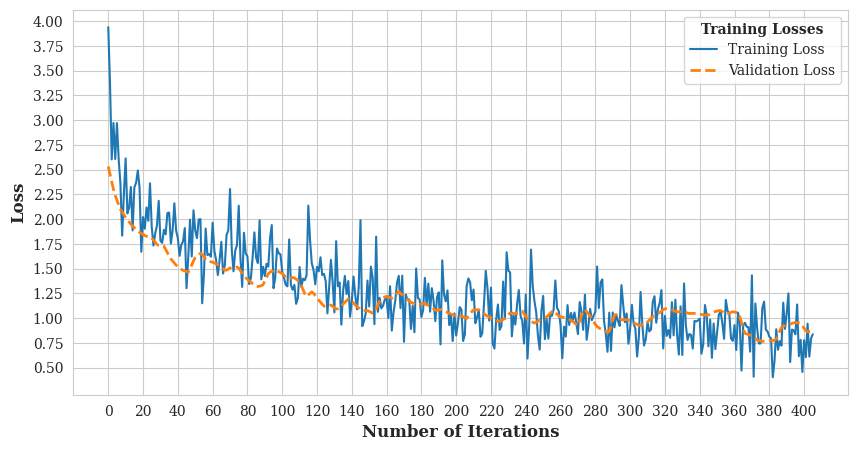

In [13]:
epochs = epoch_loss[3::6]
num_new_points = len(epochs)
new_indices = np.linspace(0, len(eval_loss) - 1, num_new_points)
interpolated_values = np.interp(new_indices, np.arange(len(eval_loss)), eval_loss)

plt.figure(figsize = (10, 5))
plt.plot(np.arange(len(epochs)), epochs, label = 'Training Loss')
plt.plot(interpolated_values, label='Validation Loss', linewidth = 2, linestyle = '--')

plt.xlabel('Number of Iterations', fontdict={'weight': 'bold', 'size': 12, 'family': 'serif'})
plt.ylabel("Loss", fontdict={'weight': 'bold', 'size': 12, 'family': 'serif'})
plt.xticks(np.arange(0, num_new_points, 20), fontsize=10, fontfamily='Serif', fontweight='normal')
plt.yticks(np.arange(0.5, 4.25, 0.25), fontsize = 10, fontfamily='Serif', fontweight='normal')

legend = plt.legend(loc='best', frameon=True, title="Training Losses", prop = {'size': 10, 'family': 'serif'})
legend.get_title().set_fontsize(10)  
legend.get_title().set_fontfamily('Serif')
legend.get_title().set_fontweight('bold')

plt.savefig('./Figures/training vs validation loss.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [19]:
with open(DISTILBERT_TRAIN_VALIDATION, 'r') as file:
    lines = file.readlines()

correct_prediction_ratio = []
for line in lines:
    if 'correct prediction ratio' in line:
        correct_prediction_ratio.append(float(line.split(' ')[-1].strip('\n')))

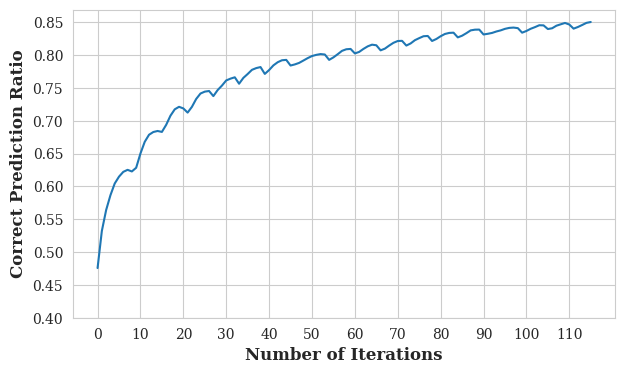

In [31]:
plt.figure(figsize = (7, 4))
plt.plot(np.arange(len(correct_prediction_ratio)), correct_prediction_ratio, label = 'Correct Prediction')

plt.xlabel('Number of Iterations', fontdict={'weight': 'bold', 'size': 12, 'family': 'serif'})
plt.ylabel("Correct Prediction Ratio", fontdict={'weight': 'bold', 'size': 12, 'family': 'serif'})
plt.xticks(np.arange(0, 120, 10), fontsize=10, fontfamily='Serif', fontweight='normal')
plt.yticks(np.arange(0.4, 0.90, 0.05), fontsize = 10, fontfamily='Serif', fontweight='normal')

# legend = plt.legend(loc='best', frameon=True, title="Training Losses", prop = {'size': 10, 'family': 'serif'})
legend.get_title().set_fontsize(10)  
legend.get_title().set_fontfamily('Serif')
legend.get_title().set_fontweight('bold')

plt.savefig('./Figures/correct prediction scores.png', dpi = 300, bbox_inches = 'tight')
plt.show()